In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix

from xgboost import XGBClassifier

In [2]:
df = pd.read_csv("nasa.csv")

In [3]:
df.sample(10)

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
801,3767015,3767015,26.1,0.016016,0.035813,16.016034,35.812940,0.009952,0.022253,52.546044,...,315.084274,413.157990,0.984481,117.556645,1.186762,2.458140e+06,238.314454,0.871337,J2000,False
3756,2279744,2279744,19.8,0.291444,0.651688,291.443905,651.688382,0.181095,0.404940,956.180820,...,263.125179,789.594070,0.650336,85.219317,2.693412,2.458150e+06,291.654510,0.455930,J2000,True
44,3170221,3170221,26.5,0.013322,0.029788,13.321557,29.787906,0.008278,0.018509,43.705896,...,264.405602,359.065807,0.974877,87.816443,1.002458,2.457942e+06,58.244024,1.002602,J2000,False
1315,3102762,3102762,24.1,0.040230,0.089958,40.230458,89.958039,0.024998,0.055897,131.989696,...,106.371724,361.180728,0.979682,101.638826,1.005411,2.458173e+06,188.482062,0.996731,J2000,False
974,2020790,2020790,16.4,1.394938,3.119177,1394.938229,3119.176705,0.866774,1.938166,4576.569140,...,302.989148,1656.502381,1.202066,168.841705,4.277663,2.458566e+06,237.118433,0.217325,J2000,False
4516,3745642,3745642,28.5,0.005303,0.011859,5.303407,11.858779,0.003295,0.007369,17.399631,...,166.159965,991.683031,0.448031,106.797373,3.444328,2.458493e+06,181.294223,0.363019,J2000,False
2653,2022771,2022771,16.8,1.160259,2.594418,1160.259082,2594.418179,0.720951,1.612096,3806.624407,...,338.991590,723.155764,0.750489,305.730904,2.402958,2.457916e+06,42.185786,0.497818,J2000,False
1982,2470310,2470310,19.4,0.350393,0.783502,350.392641,783.501764,0.217724,0.486845,1149.582193,...,262.809481,332.053790,0.567544,237.354075,1.309337,2.458158e+06,189.246109,1.084162,J2000,True
4486,3653602,3653602,22.2,0.096506,0.215794,96.506147,215.794305,0.059966,0.134088,316.621227,...,104.951875,461.224851,0.272982,164.330504,2.063556,2.457934e+06,51.876460,0.780530,J2000,False
3530,3624234,3624234,25.4,0.022108,0.049436,22.108281,49.435619,0.013737,0.030718,72.533733,...,121.978023,570.079733,0.781581,272.872727,1.909467,2.457960e+06,25.284808,0.631491,J2000,False


In [4]:
df.shape

(4687, 40)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

In [6]:
df.describe()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
count,4.687000e+03,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,...,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000
mean,3.272298e+06,3.272298e+06,22.267865,0.204604,0.457509,204.604203,457.508906,0.127135,0.284283,671.273653,...,1.400264,13.373844,172.157275,635.582076,0.813383,183.932151,1.987144,2.457728e+06,181.167927,0.738242
std,5.486011e+05,5.486011e+05,2.890972,0.369573,0.826391,369.573402,826.391249,0.229642,0.513496,1212.511199,...,0.524154,10.936227,103.276777,370.954727,0.242059,103.513035,0.951519,9.442264e+02,107.501623,0.342627
min,2.000433e+06,2.000433e+06,11.160000,0.001011,0.002260,1.010543,2.259644,0.000628,0.001404,3.315431,...,0.615920,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285
25%,3.097594e+06,3.097594e+06,20.100000,0.033462,0.074824,33.462237,74.823838,0.020792,0.046493,109.784247,...,1.000635,4.962341,83.081208,365.605031,0.630834,95.625916,1.266059,2.457815e+06,87.006918,0.453289
50%,3.514799e+06,3.514799e+06,21.900000,0.110804,0.247765,110.803882,247.765013,0.068850,0.153954,363.529809,...,1.240981,10.311836,172.625393,504.947292,0.833153,189.761641,1.618195,2.457973e+06,185.718889,0.712946
75%,3.690060e+06,3.690060e+06,24.500000,0.253837,0.567597,253.837029,567.596853,0.157727,0.352688,832.798679,...,1.678364,19.511681,255.026909,794.195972,0.997227,271.777557,2.451171,2.458108e+06,276.531946,0.984669
max,3.781897e+06,3.781897e+06,32.100000,15.579552,34.836938,15579.552413,34836.938254,9.680682,21.646663,51114.018738,...,5.072008,75.406667,359.905890,4172.231343,1.299832,359.993098,8.983852,2.458839e+06,359.917991,2.039000


In [7]:
df.isnull().sum()

Neo Reference ID                0
Name                            0
Absolute Magnitude              0
Est Dia in KM(min)              0
Est Dia in KM(max)              0
Est Dia in M(min)               0
Est Dia in M(max)               0
Est Dia in Miles(min)           0
Est Dia in Miles(max)           0
Est Dia in Feet(min)            0
Est Dia in Feet(max)            0
Close Approach Date             0
Epoch Date Close Approach       0
Relative Velocity km per sec    0
Relative Velocity km per hr     0
Miles per hour                  0
Miss Dist.(Astronomical)        0
Miss Dist.(lunar)               0
Miss Dist.(kilometers)          0
Miss Dist.(miles)               0
Orbiting Body                   0
Orbit ID                        0
Orbit Determination Date        0
Orbit Uncertainity              0
Minimum Orbit Intersection      0
Jupiter Tisserand Invariant     0
Epoch Osculation                0
Eccentricity                    0
Semi Major Axis                 0
Inclination   

In [8]:
df.columns

Index(['Neo Reference ID', 'Name', 'Absolute Magnitude', 'Est Dia in KM(min)',
       'Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)',
       'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
       'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Close Approach Date',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Relative Velocity km per hr', 'Miles per hour',
       'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbiting Body',
       'Orbit ID', 'Orbit Determination Date', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion', 'Equinox', 'Hazardous'],
      dtype='object')

In [9]:
df.drop(columns = ['Neo Reference ID','Name','Close Approach Date','Orbit Determination Date'],axis = 1,inplace = True)

In [10]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

In [11]:
cat_cols = df.select_dtypes(include="object").columns

encoder = LabelEncoder()
for col in cat_cols:
    df[col] = encoder.fit_transform(df[col])

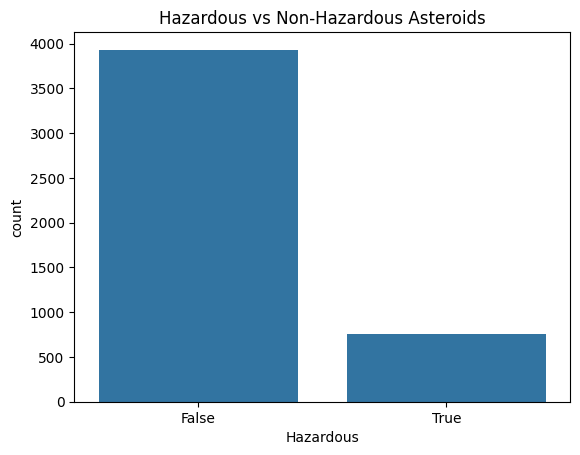

In [12]:
sns.countplot(x=df["Hazardous"])
plt.title("Hazardous vs Non-Hazardous Asteroids")
plt.show()

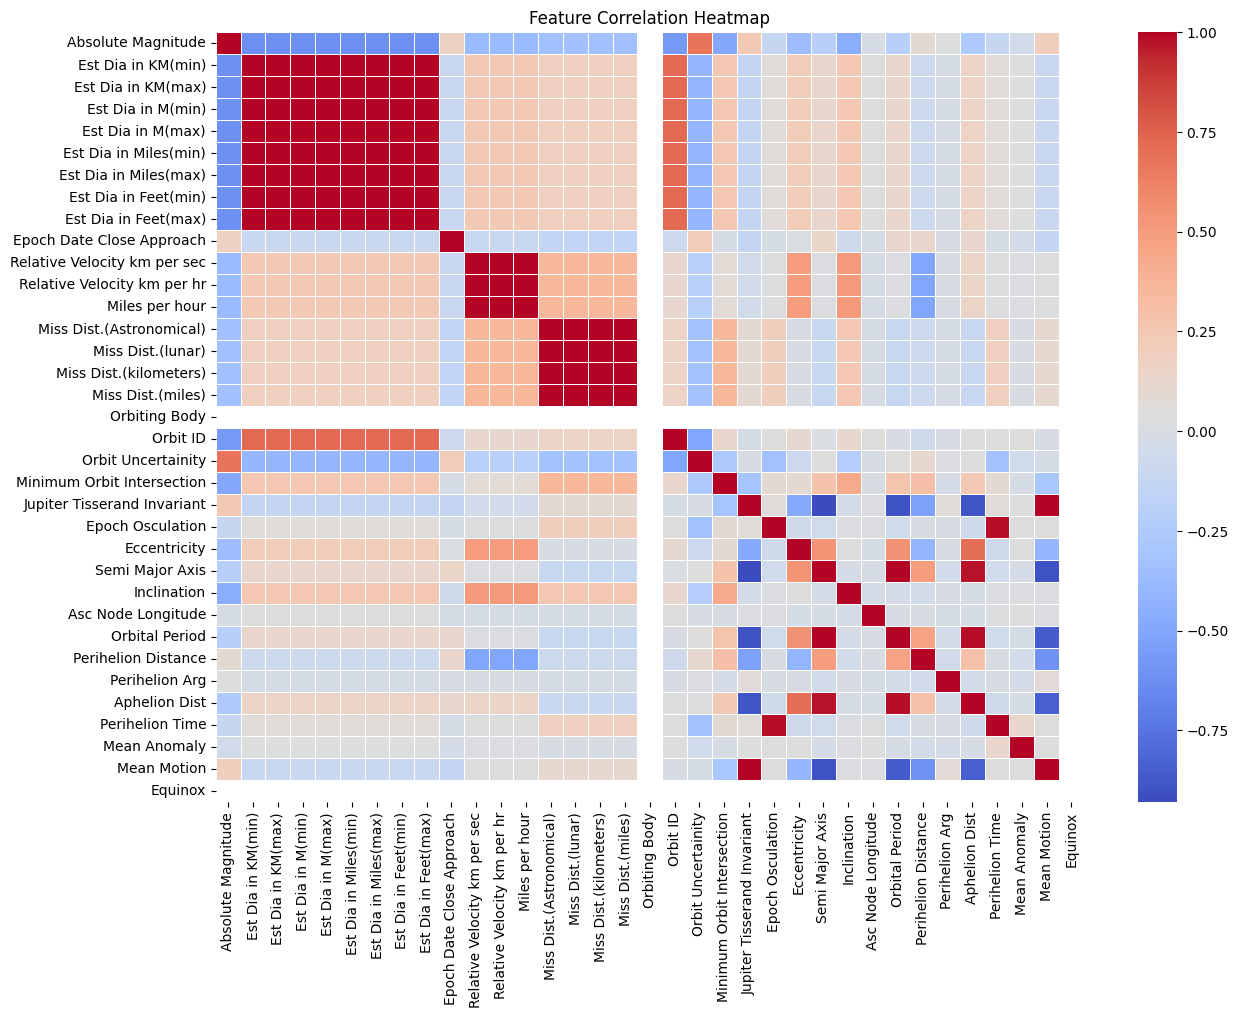

In [13]:
numeric_df = df.select_dtypes(include=["int64", "float64"])

plt.figure(figsize=(14,10))
sns.heatmap(numeric_df.corr(), cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [14]:
X = df.drop("Hazardous", axis=1)
y = df["Hazardous"]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [16]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [18]:
y_pred_lr = log_model.predict(X_test)
y_proba_lr = log_model.predict_proba(X_test)[:, 1]

lr_accuracy = accuracy_score(y_test, y_pred_lr) * 100
lr_auc = roc_auc_score(y_test, y_proba_lr)

print(f"Logistic Regression Accuracy: {lr_accuracy:.2f}%")
print(f"Logistic Regression ROC-AUC: {lr_auc:.3f}")

Logistic Regression Accuracy: 95.42%
Logistic Regression ROC-AUC: 0.989


In [19]:
xgb_model = XGBClassifier(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    eval_metric="logloss",
    random_state=42
)

xgb_model.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [20]:
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

xgb_accuracy = accuracy_score(y_test, y_pred_xgb) * 100
xgb_auc = roc_auc_score(y_test, y_proba_xgb)

print(f"XGBoost Accuracy: {xgb_accuracy:.2f}%")
print(f"XGBoost ROC-AUC: {xgb_auc:.3f}")

XGBoost Accuracy: 99.79%
XGBoost ROC-AUC: 1.000


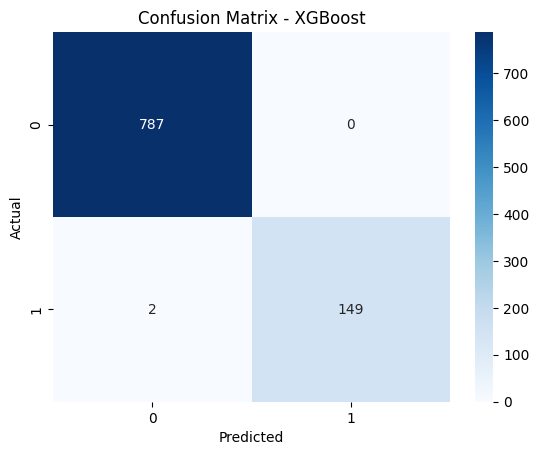

In [21]:
cm = confusion_matrix(y_test, y_pred_xgb)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

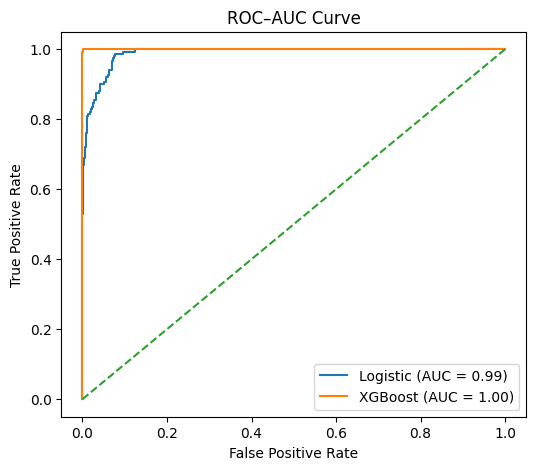

In [22]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)

plt.figure(figsize=(6,5))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic (AUC = {lr_auc:.2f})")
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {xgb_auc:.2f})")
plt.plot([0,1], [0,1], linestyle="--")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC–AUC Curve")
plt.legend()
plt.show()

In [23]:
comparison = pd.DataFrame({
    "Model": ["Logistic Regression", "XGBoost"],
    "Accuracy (%)": [round(lr_accuracy, 2), round(xgb_accuracy, 2)],
    "ROC-AUC": [round(lr_auc, 3), round(xgb_auc, 3)]
})

comparison

,Model,Accuracy (%),ROC-AUC
0,Logistic Regression,95.42,0.989
1,XGBoost,99.79,1.000
